# Analysis of EFMs computed with aspefm

In [2]:
import pickle, pandas

In [3]:
#efms = pandas.read_csv('output_ccm_ecoli_2022.csv', index_col=0)
#efms
with open('data_example/output_ccm.pkl', 'rb') as f:
    efms=pickle.load(f)


In [7]:
cinetic_optimal_efms = [4601,2032,862,2016, 
4605, 
4612 , 
4598 , 
2387 , 
864 , 
1579 , 
4593]

# Select biomass-producing EFMs

In [8]:
# select only biomass-producing efms
df_biomass = efms.copy()
df_biomass = df_biomass.loc[df_biomass['biomass'] > 0]

In [9]:
# normalize by biomass flux
#df_biomass = df_biomass.divide(df_biomass['biomass'], axis=0)
df_biomass = df_biomass.apply(lambda x: x/x['biomass'], axis=1)
df_biomass

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,pyk,rpe,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf
20,0.0,355.520000,0.0,0.0,-191.270000,0.0,1.0,355.520000,2145.110000,383.550000,...,9088.730000,-1.010000,2.250000,352.560000,352.560000,0.000000,-191.270000,0.000000,-1.010000,384.790000
21,0.0,355.106667,0.0,0.0,-190.856667,0.0,1.0,355.106667,2140.150001,383.136667,...,9064.756669,-1.836667,1.836667,352.146667,352.146667,-0.413333,-190.856667,-0.413333,-1.423333,383.136667
22,0.0,355.520000,0.0,0.0,-191.270000,0.0,1.0,355.520000,1783.430000,383.550000,...,7280.330000,-1.010000,2.250000,352.560000,352.560000,0.000000,-191.270000,0.000000,-1.010000,384.790000
23,0.0,355.106667,0.0,0.0,-190.856667,0.0,1.0,355.106667,1778.883334,383.136667,...,7258.423335,-1.836667,1.836667,352.146667,352.146667,-0.413333,-190.856667,-0.413333,-1.423333,383.136667
24,0.0,356.530000,0.0,0.0,-192.280000,0.0,1.0,356.530000,1794.540000,384.560000,...,7333.860000,1.010000,3.260000,353.570000,353.570000,1.010000,-192.280000,1.010000,0.000000,388.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.0,68.110000,0.0,0.0,80.897500,0.0,1.0,68.110000,284.260000,0.000000,...,1176.812500,0.000000,2.755000,65.150000,0.000000,0.505000,80.897500,0.505000,-0.505000,2.755000
5285,0.0,68.110000,0.0,0.0,48.070000,0.0,1.0,68.110000,352.440000,0.000000,...,1421.250000,1.010000,3.260000,65.150000,65.150000,1.010000,48.070000,1.010000,0.000000,4.270000
5286,0.0,133.260000,0.0,0.0,80.645000,0.0,1.0,133.260000,678.190000,0.000000,...,2756.825000,1.010000,3.260000,130.300000,130.300000,1.010000,80.645000,1.010000,0.000000,4.270000
5287,0.0,68.110000,0.0,0.0,48.322500,0.0,1.0,68.110000,349.410000,0.000000,...,1404.837500,0.000000,2.755000,65.150000,65.150000,0.505000,48.322500,0.505000,-0.505000,2.755000


In [10]:
# compute operating costs or yields
# units are O2 Mol / C Mol Biomass and C Mol Glucose / C Mol Biomass
# 1 Glucose molecule corresponds to 6 C Mol
df_yields = df_biomass.copy()
df_yields['o2_biomass_yield'] = df_yields['ex-o2'] / df_yields['biomass']
df_yields['c_biomass_yield'] = 6*df_yields['pts'] / df_yields['biomass']

In [11]:
# 106.86 is the actual number of C moles in the biomass computed from stoichiometry and metabolites formula
# we obtain results similar to Carlson and Srienc, 2004
num_c_moles_biomass = 106.86
df_yields['o2_biomass_yield'] /= num_c_moles_biomass
df_yields['c_biomass_yield'] /= num_c_moles_biomass
df_yields

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
20,0.0,355.520000,0.0,0.0,-191.270000,0.0,1.0,355.520000,2145.110000,383.550000,...,2.250000,352.560000,352.560000,0.000000,-191.270000,0.000000,-1.010000,384.790000,10.037011,10.953397
21,0.0,355.106667,0.0,0.0,-190.856667,0.0,1.0,355.106667,2140.150001,383.136667,...,1.836667,352.146667,352.146667,-0.413333,-190.856667,-0.413333,-1.423333,383.136667,10.013803,10.930189
22,0.0,355.520000,0.0,0.0,-191.270000,0.0,1.0,355.520000,1783.430000,383.550000,...,2.250000,352.560000,352.560000,0.000000,-191.270000,0.000000,-1.010000,384.790000,8.344703,10.953397
23,0.0,355.106667,0.0,0.0,-190.856667,0.0,1.0,355.106667,1778.883334,383.136667,...,1.836667,352.146667,352.146667,-0.413333,-190.856667,-0.413333,-1.423333,383.136667,8.323429,10.930189
24,0.0,356.530000,0.0,0.0,-192.280000,0.0,1.0,356.530000,1794.540000,384.560000,...,3.260000,353.570000,353.570000,1.010000,-192.280000,1.010000,0.000000,388.830000,8.396687,11.010107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.0,68.110000,0.0,0.0,80.897500,0.0,1.0,68.110000,284.260000,0.000000,...,2.755000,65.150000,0.000000,0.505000,80.897500,0.505000,-0.505000,2.755000,1.330058,4.727821
5285,0.0,68.110000,0.0,0.0,48.070000,0.0,1.0,68.110000,352.440000,0.000000,...,3.260000,65.150000,65.150000,1.010000,48.070000,1.010000,0.000000,4.270000,1.649074,2.912970
5286,0.0,133.260000,0.0,0.0,80.645000,0.0,1.0,133.260000,678.190000,0.000000,...,3.260000,130.300000,130.300000,1.010000,80.645000,1.010000,0.000000,4.270000,3.173264,4.741999
5287,0.0,68.110000,0.0,0.0,48.322500,0.0,1.0,68.110000,349.410000,0.000000,...,2.755000,65.150000,65.150000,0.505000,48.322500,0.505000,-0.505000,2.755000,1.634896,2.898793


In [12]:
# filter efms with yields that are outliers
df_yields_filter = df_yields.copy()
df_yields_filter = df_yields_filter.loc[df_yields['o2_biomass_yield'] < 1]
df_yields_filter = df_yields_filter.loc[df_yields['c_biomass_yield'] < 10]
df_yields_filter

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
53,0.000,2.960000,22.570,22.570,120.808667,1.934667,1.0,2.960000,0.000000,22.180000,...,1.836667,0.000000,0.000000,-0.413333,120.808667,-0.413333,-1.423333,22.180000,0.000000,8.162568
54,0.000,2.960000,23.810,23.810,123.454000,1.356000,1.0,2.960000,0.000000,19.700000,...,2.250000,0.000000,0.000000,0.000000,123.454000,0.000000,-1.010000,20.940000,0.000000,8.195059
55,-13.635,2.960000,8.935,8.935,120.808667,15.569667,1.0,2.960000,0.000000,22.180000,...,1.836667,0.000000,0.000000,-0.413333,120.808667,-0.413333,-1.423333,22.180000,0.000000,8.162568
56,-14.875,2.960000,8.935,8.935,123.454000,16.231000,1.0,2.960000,0.000000,19.700000,...,2.250000,0.000000,0.000000,0.000000,123.454000,0.000000,-1.010000,20.940000,0.000000,8.195059
57,0.000,7.380000,35.830,35.830,140.145556,0.000000,1.0,7.380000,0.000000,17.760000,...,1.836667,4.420000,0.000000,-0.413333,140.145556,-0.413333,-1.423333,17.760000,0.000000,9.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,0.000,17.931642,0.000,0.000,18.757463,120.056716,1.0,17.931642,119.579851,4.728358,...,2.250000,14.971642,14.971642,0.000000,18.757463,0.000000,-1.010000,5.968358,0.559516,1.475902
5269,0.000,20.381000,0.000,0.000,32.916000,95.458000,1.0,20.381000,96.374000,0.000000,...,3.260000,17.421000,0.000000,1.010000,32.916000,1.010000,0.000000,4.270000,0.450936,2.062100
5270,0.000,21.037500,0.000,0.000,33.825000,94.145000,1.0,21.037500,95.970000,0.000000,...,2.755000,18.077500,0.000000,0.505000,33.825000,0.505000,-0.505000,2.755000,0.449045,2.084784
5275,0.000,20.736531,0.000,0.000,24.383265,112.523469,1.0,20.736531,115.572653,0.000000,...,3.260000,17.776531,17.776531,1.010000,24.383265,1.010000,0.000000,4.270000,0.540767,1.583002


In [13]:
# returns True if the row is at the pareto frontier for variables xlabel and ylabel
def is_pareto_front(row, xlabel, ylabel):
    
    config_base = df_yields_filter # should be defined prior
    x = row[xlabel]
    y = row[ylabel]
    
    # look for points with the same y value but smaller x value
    is_min_x = config_base.loc[config_base[ylabel]==y].min()[xlabel] >= x
    # look for points with the same x value but smaller y value
    is_min_y = config_base.loc[config_base[xlabel]==x].min()[ylabel] >= y
    # look for points that are smaller in both x and y
    is_double = len(config_base.loc[(config_base[xlabel]<x) & (config_base[ylabel]<y)])==0
    
    return is_min_x and is_min_y and is_double

# Pareto optimality in Oxygen and Carbon uptake rate

In [14]:
is_pareto = df_yields_filter.apply(lambda row: is_pareto_front(row, 'c_biomass_yield', 'o2_biomass_yield') ,axis=1)

In [15]:
df_biomass_pareto = df_yields_filter.loc[is_pareto]
df_biomass_pareto = df_biomass_pareto.sort_values('c_biomass_yield')
df_biomass_pareto

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
5064,-46.356458,40.196458,0.0000,0.0000,11.646667,148.5400,1.0,40.196458,157.975833,0.0,...,1.836667,37.236458,37.236458,-0.413333,11.646667,-0.413333,-1.423333,0.000,0.739172,0.787947
5065,-45.516875,39.356875,0.0000,0.0000,11.440000,148.5400,1.0,39.356875,157.097500,0.0,...,2.250000,36.396875,36.396875,0.000000,11.440000,0.000000,-1.010000,1.240,0.735062,0.799551
5067,-44.491094,38.331094,0.0000,0.0000,11.187500,148.5400,1.0,38.331094,156.024375,0.0,...,2.755000,35.371094,35.371094,0.505000,11.187500,0.505000,-0.505000,2.755,0.730041,0.813728
5066,-43.465312,37.305312,0.0000,0.0000,10.935000,148.5400,1.0,37.305312,154.951250,0.0,...,3.260000,34.345312,34.345312,1.010000,10.935000,1.010000,0.000000,4.270,0.725020,0.827906
4230,-35.401250,29.241250,0.0000,0.0000,8.950000,148.5400,1.0,29.241250,146.515000,0.0,...,7.230000,26.281250,26.281250,4.980000,8.950000,4.980000,3.970000,16.180,0.685547,0.939360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-19.662500,2.960000,10.5425,10.5425,89.339583,0.0000,1.0,2.960000,10.125000,0.0,...,5.533333,0.000000,0.000000,3.283333,89.339583,3.283333,2.273333,11.090,0.047375,5.357828
458,-17.995000,2.960000,8.8750,8.8750,91.840833,0.0000,1.0,2.960000,6.790000,0.0,...,5.533333,0.000000,0.000000,3.283333,91.840833,3.283333,2.273333,11.090,0.031771,5.498269
897,64.107500,2.960000,97.7675,97.7675,98.630833,-95.6825,1.0,2.960000,0.000000,0.0,...,5.533333,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090,0.000000,5.879515
451,-21.390000,2.960000,12.2700,12.2700,98.630833,-10.1850,1.0,2.960000,0.000000,0.0,...,5.533333,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090,0.000000,5.879515


In [16]:
# compute convex hull
from scipy.spatial import ConvexHull
sp = []
df_hull_all = ConvexHull(df_yields_filter[['o2_biomass_yield', 'c_biomass_yield']])
for vertices in df_hull_all.vertices:
    if df_yields_filter.iloc[vertices].name in df_biomass_pareto.index:
        sp.append(vertices)
df_hull = df_yields_filter.iloc[sp]
df_hull = df_hull.sort_values('c_biomass_yield')
df_hull

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
5064,-46.356458,40.196458,0.00,0.00,11.646667,148.540000,1.0,40.196458,157.975833,0.0,...,1.836667,37.236458,37.236458,-0.413333,11.646667,-0.413333,-1.423333,0.000000,0.739172,0.787947
4397,-20.631250,26.757917,0.00,0.00,17.790000,123.966667,1.0,26.757917,128.795000,0.0,...,1.836667,23.797917,23.797917,-0.413333,17.790000,-0.413333,-1.423333,0.000000,0.602634,1.132884
4400,-18.926250,25.466250,0.00,0.00,17.790000,123.140000,1.0,25.466250,126.935000,0.0,...,2.250000,22.506250,22.506250,0.000000,17.790000,0.000000,-1.010000,1.240000,0.593931,1.156092
4432,-16.843125,23.888125,0.00,0.00,17.790000,122.130000,1.0,23.888125,124.662500,0.0,...,2.755000,20.928125,20.928125,0.505000,17.790000,0.505000,-0.505000,2.755000,0.583298,1.184447
5013,0.000000,14.327636,0.00,0.00,20.989455,107.564727,1.0,14.327636,106.288182,0.0,...,3.638727,11.367636,11.367636,1.388727,20.989455,1.388727,0.378727,5.406182,0.497324,1.413710
862,18.388824,2.960000,0.00,0.00,23.552745,93.522353,1.0,2.960000,86.227647,0.0,...,5.533333,0.000000,0.000000,3.283333,23.552745,3.283333,2.273333,11.090000,0.403461,1.664013
916,29.850833,2.960000,0.00,0.00,29.283750,70.598333,1.0,2.960000,70.180833,0.0,...,5.533333,0.000000,0.000000,3.283333,29.283750,3.283333,2.273333,11.090000,0.328377,1.985799
892,31.518333,2.960000,0.00,0.00,33.452500,67.263333,1.0,2.960000,65.178333,0.0,...,5.533333,0.000000,0.000000,3.283333,33.452500,3.283333,2.273333,11.090000,0.304971,2.219867
449,0.000000,2.960000,33.66,33.66,98.630833,-31.575000,1.0,2.960000,0.000000,0.0,...,5.533333,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090000,0.000000,5.879515


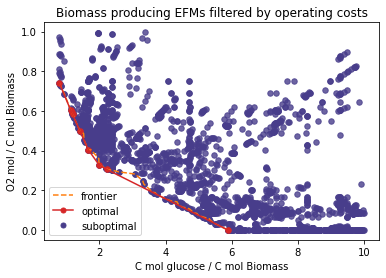

In [17]:
# plot pareto optimal efms which belong to the convex hull
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
plt.clf()
mpl.style.use('default')
s = plt.scatter(df_yields_filter['c_biomass_yield'], df_yields_filter['o2_biomass_yield'], color='darkslateblue', s=30, alpha=0.8)
s = plt.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], color='darkslateblue', s=30)
s = plt.scatter(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], color='C3', s=30)
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
ora = mlines.Line2D([], [], color='C1', marker='', markersize=10, label='frontier', ls='--')
yel = mlines.Line2D([], [], color='C3', marker='.', markersize=10, label='optimal', ls='-')
pur = mlines.Line2D([], [], color='darkslateblue', marker='.',markersize=10, label='suboptimal', ls='')
plt.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], '--', color='C1', label='Pareto frontier', alpha=1)
plt.plot(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], '', color='C3')
plt.legend(handles=[ora, yel, pur])
plt.show()

In [24]:
df_cin = df_yields_filter.loc[cinetic_optimal_efms]
df_cin

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
4601,22.710882,2.96,0.0,0.0,17.790000,93.522353,1.0,2.96,86.227647,8.644118,...,4.092647,0.0,0.0,1.842647,17.790000,1.842647,0.832647,15.412059,0.403461,1.744905
2032,10.782000,2.96,0.0,0.0,17.790000,108.736000,1.0,2.96,94.526000,0.000000,...,9.452000,0.0,0.0,7.202000,17.790000,7.202000,6.192000,22.846000,0.442289,1.560472
862,18.388824,2.96,0.0,0.0,23.552745,93.522353,1.0,2.96,86.227647,0.000000,...,5.533333,0.0,0.0,3.283333,23.552745,3.283333,2.273333,11.090000,0.403461,1.664013
2016,8.400833,2.96,0.0,0.0,15.958333,113.498333,1.0,2.96,97.456667,0.000000,...,10.734167,0.0,0.0,8.484167,15.958333,8.484167,7.474167,26.692500,0.456002,1.529618
4605,25.399143,2.96,0.0,0.0,14.554571,93.141714,1.0,2.96,86.608286,13.640000,...,3.260000,0.0,0.0,1.010000,14.554571,1.010000,0.000000,17.910000,0.405242,1.797000
4612,27.029571,2.96,0.0,0.0,12.592286,92.910857,1.0,2.96,86.839143,16.670000,...,2.755000,0.0,0.0,0.505000,12.592286,0.505000,-0.505000,19.425000,0.406322,1.828595
4598,28.660000,2.96,0.0,0.0,10.630000,92.680000,1.0,2.96,87.070000,19.700000,...,2.250000,0.0,0.0,0.000000,10.630000,0.000000,-1.010000,20.940000,0.407402,1.860191
2387,0.000000,2.96,0.0,0.0,9.496154,130.300000,1.0,2.96,107.796154,0.000000,...,15.257692,0.0,0.0,13.007692,9.496154,13.007692,11.997692,40.263077,0.504380,1.420766
864,19.504194,2.96,0.0,0.0,24.110430,97.612043,1.0,2.96,88.458387,0.000000,...,5.533333,0.0,0.0,3.283333,24.110430,3.283333,2.273333,11.090000,0.413898,1.695326
1579,4.526154,2.96,0.0,0.0,17.790000,112.793846,1.0,2.96,95.202308,0.000000,...,11.650000,0.0,0.0,9.400000,17.790000,9.400000,8.390000,29.440000,0.445453,1.683885


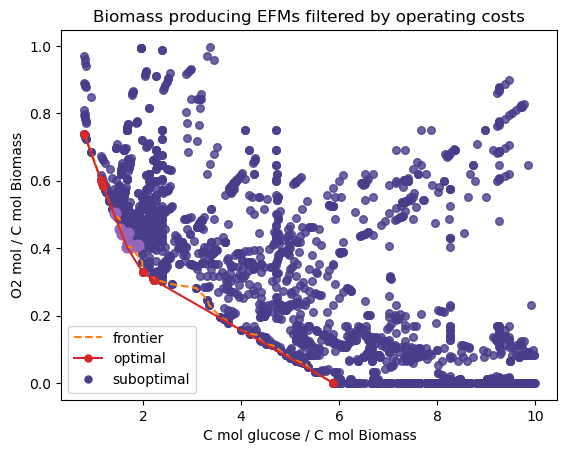

In [19]:
# plot pareto optimal efms which belong to the convex hull
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
plt.clf()
mpl.style.use('default')
s = plt.scatter(df_yields_filter['c_biomass_yield'], df_yields_filter['o2_biomass_yield'], color='darkslateblue', s=30, alpha=0.8)
s = plt.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], color='darkslateblue', s=30)
s = plt.scatter(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], color='C3', s=30)
s = plt.scatter(df_cin['c_biomass_yield'], df_cin['o2_biomass_yield'], color='C4', s=60)
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
ora = mlines.Line2D([], [], color='C1', marker='', markersize=10, label='frontier', ls='--')
yel = mlines.Line2D([], [], color='C3', marker='.', markersize=10, label='optimal', ls='-')
pur = mlines.Line2D([], [], color='darkslateblue', marker='.',markersize=10, label='suboptimal', ls='')
plt.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], '--', color='C1', label='Pareto frontier', alpha=1)
plt.plot(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], '', color='C3')
plt.legend(handles=[ora, yel, pur])
plt.show()

In [20]:
[x for x in cinetic_optimal_efms if x in df_biomass_pareto.index]

[4601, 2032, 862, 2016]

In [21]:
[x for x in cinetic_optimal_efms if x in df_hull.index]

[862]

# Pareto optimality also considering Amino Acid cost

In [22]:
with open('data/ccm/param_ecoli_w.dict', 'r') as f:
    d = eval(f.read())
costs = pandas.Series(d['costs'])
costs = costs.drop('nadp-thd')
pandas.DataFrame(costs).T

FileNotFoundError: [Errno 2] No such file or directory: 'data/ccm/param_ecoli_w.dict'

In [143]:
df_3d = df_yields.copy()
df_3d['aa_cost'] = df_biomass.dot(costs.T)
df_3d

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield,aa_cost
127,0.000,25.140000,106.870000,106.870000,240.785555,0.000000,1.0,25.140000,0.000000,0.000000,...,22.180000,0.000000,-0.413333,240.785555,-0.413333,-1.423333,0.000000,0.000000,13.653690,7.153331e+06
128,0.000,25.140000,106.870000,106.870000,476.870000,0.000000,1.0,25.140000,0.000000,0.000000,...,22.180000,0.000000,-0.413333,476.870000,-0.413333,-1.423333,0.000000,0.000000,26.909414,1.299005e+07
129,-69.085,25.140000,37.785000,37.785000,200.530000,0.000000,1.0,25.140000,0.000000,0.000000,...,22.180000,0.000000,-0.413333,200.530000,-0.413333,-1.423333,0.000000,0.000000,11.393412,5.208312e+06
130,-69.085,25.140000,37.785000,37.785000,194.728889,0.000000,1.0,25.140000,0.000000,0.000000,...,22.180000,0.000000,-0.413333,194.728889,-0.413333,-1.423333,0.000000,0.000000,11.067690,5.064891e+06
131,-24.725,2.960000,15.605000,15.605000,148.469333,17.482333,1.0,2.960000,0.000000,0.000000,...,0.000000,0.000000,3.283333,148.469333,3.283333,2.273333,11.090000,0.000000,8.677859,3.662616e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.000,13.341724,0.000000,0.000000,28.171724,101.688276,1.0,13.341724,98.100345,3.258276,...,10.381724,10.381724,1.010000,28.171724,1.010000,0.000000,7.528276,0.459013,1.978664,2.981986e+06
5285,0.000,18.376667,209.760000,209.760000,33.206667,0.000000,1.0,18.376667,128.310000,94.876667,...,15.416667,15.416667,1.010000,33.206667,1.010000,0.000000,99.146667,0.600365,7.405577,1.355418e+07
5286,0.000,18.912273,208.658182,208.658182,33.742273,0.000000,1.0,18.912273,128.493636,94.310455,...,15.952273,15.952273,0.505000,33.742273,0.505000,-0.505000,97.065455,0.601224,7.375504,1.352983e+07
5287,0.000,45.620465,128.028605,128.028605,60.450465,0.000000,1.0,45.620465,111.963721,40.389070,...,42.660465,42.660465,1.010000,60.450465,1.010000,0.000000,44.659070,0.523880,5.875886,4.643879e+06


In [144]:
# filter efms with yields that are outliers
df_yields_filter = df_3d.copy()
df_yields_filter = df_yields_filter.loc[df_3d['o2_biomass_yield'] < 1]
df_yields_filter = df_yields_filter.loc[df_3d['c_biomass_yield'] < 10]
df_yields_filter = df_yields_filter.loc[df_3d['aa_cost'] < 1e7]
df_yields_filter

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield,aa_cost
131,-24.725000,2.960000,15.605000,15.605000,148.469333,17.482333,1.0,2.960000,0.000000,0.000000,...,0.000000,0.000000,3.283333,148.469333,3.283333,2.273333,11.090000,0.000000,8.677859,3.662616e+06
132,-7.242667,2.960000,33.087333,33.087333,148.469333,0.000000,1.0,2.960000,0.000000,0.000000,...,0.000000,0.000000,3.283333,148.469333,3.283333,2.273333,11.090000,0.000000,8.677859,3.720640e+06
135,0.000000,2.960000,40.330000,40.330000,153.297778,0.000000,1.0,2.960000,0.000000,0.000000,...,0.000000,0.000000,3.283333,153.297778,3.283333,2.273333,11.090000,0.000000,8.948967,3.939586e+06
161,-64.125000,22.660000,35.305000,35.305000,172.766000,16.169000,1.0,22.660000,19.700000,0.000000,...,19.700000,19.700000,0.000000,172.766000,0.000000,-1.010000,1.240000,0.092177,9.857720,4.748426e+06
163,-52.005000,16.600000,29.245000,29.245000,165.292000,16.573000,1.0,16.600000,13.640000,0.000000,...,13.640000,13.640000,1.010000,165.292000,1.010000,0.000000,4.270000,0.063822,9.494778,4.414416e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,0.000000,77.463571,215.066429,215.066429,1.010000,0.000000,1.0,77.463571,184.141429,159.270000,...,74.503571,74.503571,1.010000,1.010000,1.010000,0.000000,163.540000,0.861601,9.213363,7.636933e+06
5283,0.000000,13.463621,0.000000,0.000000,28.293621,99.041379,1.0,13.463621,95.801724,6.166379,...,10.503621,10.503621,0.505000,28.293621,0.505000,-0.505000,8.921379,0.448258,2.120438,2.989877e+06
5284,0.000000,13.341724,0.000000,0.000000,28.171724,101.688276,1.0,13.341724,98.100345,3.258276,...,10.381724,10.381724,1.010000,28.171724,1.010000,0.000000,7.528276,0.459013,1.978664,2.981986e+06
5287,0.000000,45.620465,128.028605,128.028605,60.450465,0.000000,1.0,45.620465,111.963721,40.389070,...,42.660465,42.660465,1.010000,60.450465,1.010000,0.000000,44.659070,0.523880,5.875886,4.643879e+06


In [145]:
is_pareto = df_yields_filter.apply(lambda row: is_pareto_front(row, 'c_biomass_yield', 'o2_biomass_yield') ,axis=1)

In [146]:
is_pareto_2 = df_yields_filter.apply(lambda row: is_pareto_front(row, 'c_biomass_yield', 'aa_cost') ,axis=1)

In [147]:
is_pareto_3 = df_yields_filter.apply(lambda row: is_pareto_front(row, 'o2_biomass_yield', 'aa_cost') ,axis=1)

In [148]:
df_biomass_pareto = df_yields_filter.loc[is_pareto | is_pareto_2 | is_pareto_3]
df_biomass_pareto = df_biomass_pareto.sort_values(['o2_biomass_yield', 'c_biomass_yield', 'aa_cost'],ascending=[True, False, True])
df_biomass_pareto

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield,aa_cost
1512,-18.055000,2.960000,8.9350,8.9350,88.070000,-10.1850,1.0,2.960000,0.000000,13.34,...,0.000000,0.000000,1.060000,88.070000,1.060000,0.050000,17.760,0.000000,5.910724,1.865682e+06
1552,-21.390000,2.960000,12.2700,12.2700,98.630833,-10.1850,1.0,2.960000,0.000000,0.00,...,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090,0.000000,5.879515,1.975335e+06
1750,0.000000,2.960000,33.6600,33.6600,98.630833,-31.5750,1.0,2.960000,0.000000,0.00,...,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090,0.000000,5.879515,2.046328e+06
1752,64.107500,2.960000,97.7675,97.7675,98.630833,-95.6825,1.0,2.960000,0.000000,0.00,...,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090,0.000000,5.879515,2.259101e+06
1301,-14.510000,2.960000,5.5400,5.5400,81.080000,0.0000,1.0,2.960000,6.790000,13.64,...,0.000000,0.000000,1.010000,81.080000,1.010000,0.000000,17.910,0.031771,5.532285,1.842207e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,-35.401250,29.241250,0.0000,0.0000,8.950000,148.5400,1.0,29.241250,146.515000,0.00,...,26.281250,26.281250,4.980000,8.950000,4.980000,3.970000,16.180,0.685547,0.939360,2.839884e+06
2960,-43.465312,37.305312,0.0000,0.0000,10.935000,148.5400,1.0,37.305312,154.951250,0.00,...,34.345312,34.345312,1.010000,10.935000,1.010000,0.000000,4.270,0.725020,0.827906,2.985839e+06
3038,-44.491094,38.331094,0.0000,0.0000,11.187500,148.5400,1.0,38.331094,156.024375,0.00,...,35.371094,35.371094,0.505000,11.187500,0.505000,-0.505000,2.755,0.730041,0.813728,3.004405e+06
3039,-45.516875,39.356875,0.0000,0.0000,11.440000,148.5400,1.0,39.356875,157.097500,0.00,...,36.396875,36.396875,0.000000,11.440000,0.000000,-1.010000,1.240,0.735062,0.799551,3.022971e+06


In [149]:
# compute convex hull
from scipy.spatial import ConvexHull
sp = set()
# 1 (O2, C)
df_hull_all = ConvexHull(df_yields_filter[['o2_biomass_yield', 'c_biomass_yield']])
for vertices in df_hull_all.vertices:
    if df_yields_filter.iloc[vertices].name in df_biomass_pareto.index:
        sp.add(vertices)
# 2 (O2, AA)
df_hull_all = ConvexHull(df_yields_filter[['o2_biomass_yield', 'aa_cost']])
for vertices in df_hull_all.vertices:
    if df_yields_filter.iloc[vertices].name in df_biomass_pareto.index:
        sp.add(vertices)
# 3 (C, AA)
df_hull_all = ConvexHull(df_yields_filter[['aa_cost', 'c_biomass_yield']])
for vertices in df_hull_all.vertices:
    if df_yields_filter.iloc[vertices].name in df_biomass_pareto.index:
        sp.add(vertices)
sp = list(sp)
df_hull = df_yields_filter.iloc[sp]
df_hull = df_hull.sort_values(['o2_biomass_yield', 'c_biomass_yield', 'aa_cost'],ascending=[True, False, True])
df_hull

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield,aa_cost
1512,-18.055000,2.960000,8.935,8.935,88.070000,-10.185000,1.0,2.960000,0.000000,13.34,...,0.000000,0.000000,1.060000,88.070000,1.060000,0.050000,17.760000,0.000000,5.910724,1.865682e+06
1552,-21.390000,2.960000,12.270,12.270,98.630833,-10.185000,1.0,2.960000,0.000000,0.00,...,0.000000,0.000000,3.283333,98.630833,3.283333,2.273333,11.090000,0.000000,5.879515,1.975335e+06
1250,-9.120000,2.960000,0.000,0.000,70.200000,16.620000,1.0,2.960000,17.870000,13.34,...,0.000000,0.000000,1.060000,70.200000,1.060000,0.050000,17.760000,0.083614,4.907355,1.789591e+06
319,31.518333,2.960000,0.000,0.000,33.452500,67.263333,1.0,2.960000,65.178333,0.00,...,0.000000,0.000000,3.283333,33.452500,3.283333,2.273333,11.090000,0.304971,2.219867,1.765245e+06
1563,39.300000,2.960000,0.000,0.000,21.780000,65.040000,1.0,2.960000,66.290000,13.34,...,0.000000,0.000000,1.060000,21.780000,1.060000,0.050000,17.760000,0.310172,2.188658,1.663772e+06
3877,29.850833,2.960000,0.000,0.000,29.283750,70.598333,1.0,2.960000,70.180833,0.00,...,0.000000,0.000000,3.283333,29.283750,3.283333,2.273333,11.090000,0.328377,1.985799,1.697496e+06
2915,18.388824,2.960000,0.000,0.000,23.552745,93.522353,1.0,2.960000,86.227647,0.00,...,0.000000,0.000000,3.283333,23.552745,3.283333,2.273333,11.090000,0.403461,1.664013,2.833778e+06
4193,12.993333,2.960000,0.000,0.000,17.790000,104.313333,1.0,2.960000,90.103333,0.00,...,0.000000,0.000000,9.413333,17.790000,9.413333,8.403333,29.480000,0.421595,1.684634,1.949891e+06
2917,0.000000,14.327636,0.000,0.000,20.989455,107.564727,1.0,14.327636,106.288182,0.00,...,11.367636,11.367636,1.388727,20.989455,1.388727,0.378727,5.406182,0.497324,1.413710,2.913644e+06
2958,-9.120000,2.960000,0.000,0.000,2.480769,148.540000,1.0,2.960000,119.020769,0.00,...,0.000000,0.000000,17.918462,2.480769,17.918462,16.908462,54.995385,0.556900,1.302596,2.364211e+06


Text(0.5, 0, 'Nitrogen cost')

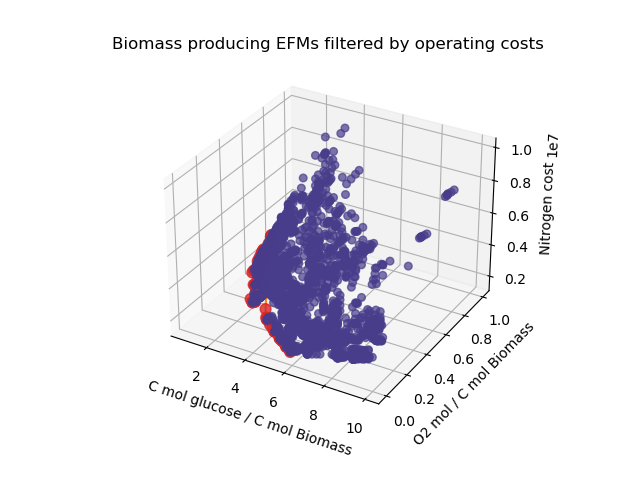

In [150]:
%matplotlib widget
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure()
mpl.style.use('default')
ax = plt.axes(projection='3d')
df_yields_other = df_yields_filter.copy().drop(df_biomass_pareto.index)
s3 = ax.scatter(df_yields_other['c_biomass_yield'], df_yields_other['o2_biomass_yield'], df_yields_other['aa_cost'], color='darkslateblue', s=30, alpha=0.7)
s4 = ax.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], df_biomass_pareto['aa_cost'], color='C3', s=60, alpha=0.8)
s3 = ax.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], df_biomass_pareto['aa_cost'], color='C1')
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
ax.set_zlabel('Nitrogen cost')

In [155]:
df_hull[['ex-ace', 'ex-lac', 'ex-etoh', 'pdh', 'pfl', 'scs', 'mdh', 'o2_biomass_yield', 'c_biomass_yield', 'aa_cost']]

,ex-ace,ex-lac,ex-etoh,pdh,pfl,scs,mdh,o2_biomass_yield,c_biomass_yield,aa_cost
1512,-18.055000,181.000,8.935,0.000000,0.000000,0.000000,0.000000,0.000000,5.910724,1.865682e+06
1552,-21.390000,170.995,12.270,0.000000,0.000000,0.000000,-6.670000,0.000000,5.879515,1.975335e+06
1250,-9.120000,145.260,0.000,0.000000,0.000000,0.000000,0.000000,0.083614,4.907355,1.789591e+06
319,31.518333,0.000,0.000,0.000000,40.638333,0.000000,-6.670000,0.304971,2.219867,1.765245e+06
1563,39.300000,0.000,0.000,0.000000,48.420000,0.000000,0.000000,0.310172,2.188658,1.663772e+06
3877,29.850833,0.000,0.000,0.000000,38.970833,0.000000,0.000000,0.328377,1.985799,1.697496e+06
2915,18.388824,0.000,0.000,27.508824,0.000000,0.000000,0.000000,0.403461,1.664013,2.833778e+06
4193,12.993333,0.000,0.000,0.000000,22.113333,0.000000,0.000000,0.421595,1.684634,1.949891e+06
2917,0.000000,0.000,0.000,20.487636,0.000000,11.367636,11.367636,0.497324,1.413710,2.913644e+06
2958,-9.120000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.556900,1.302596,2.364211e+06


In [157]:
# cinetic EFMs remainder
df_cin = df_yields_filter.loc[cinetic_optimal_efms]
df_cin

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield,aa_cost
2915,18.388824,2.96,0.0,0.0,23.552745,93.522353,1.0,2.96,86.227647,0.000000,...,0.0,0.0,3.283333,23.552745,3.283333,2.273333,11.090000,0.403461,1.664013,2.833778e+06
3664,22.710882,2.96,0.0,0.0,17.790000,93.522353,1.0,2.96,86.227647,8.644118,...,0.0,0.0,1.842647,17.790000,1.842647,0.832647,15.412059,0.403461,1.744905,2.990452e+06
2924,10.782000,2.96,0.0,0.0,17.790000,108.736000,1.0,2.96,94.526000,0.000000,...,0.0,0.0,7.202000,17.790000,7.202000,6.192000,22.846000,0.442289,1.560472,2.680916e+06
2992,8.400833,2.96,0.0,0.0,15.958333,113.498333,1.0,2.96,97.456667,0.000000,...,0.0,0.0,8.484167,15.958333,8.484167,7.474167,26.692500,0.456002,1.529618,2.643024e+06


Text(0.5, 0, 'Nitrogen cost')

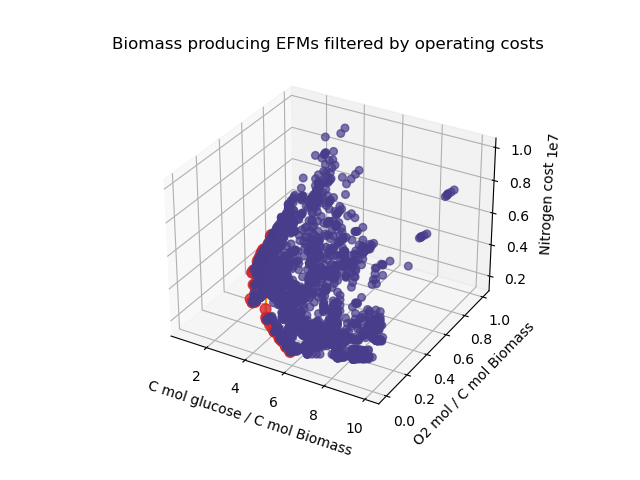

In [158]:
%matplotlib widget
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure()
mpl.style.use('default')
ax = plt.axes(projection='3d')
df_yields_other = df_yields_filter.copy().drop(df_biomass_pareto.index)
s3 = ax.scatter(df_yields_other['c_biomass_yield'], df_yields_other['o2_biomass_yield'], df_yields_other['aa_cost'], color='darkslateblue', s=30, alpha=0.7)
s4 = ax.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], df_biomass_pareto['aa_cost'], color='C3', s=60, alpha=0.8)
s5 = ax.scatter(df_cin['c_biomass_yield'], df_cin['o2_biomass_yield'], df_cin['aa_cost'], color='C4', s=60)
s6 = ax.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], df_biomass_pareto['aa_cost'], color='C1')
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
ax.set_zlabel('Nitrogen cost')

In [159]:
[x for x in cinetic_optimal_efms if x in df_biomass_pareto.index]

[2915, 3664, 2924, 2992]

In [163]:
[x for x in cinetic_optimal_efms if x in df_hull.index]

[2915]